In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy.stats import skew
from sklearn.preprocessing import power_transform
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore")

In [113]:
tit=pd.read_csv("titanic_train.csv")

In [114]:
tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


OBSERVATION:


As we can observe the data set has 12 features.

Here the Survived column is the target variable or class label.

We have numerical , categorical type of features

In [115]:
print("Rows, columns: " + str(tit.shape))

Rows, columns: (891, 12)


OBSERVATION:

Shape of data is (891,12) means in our data set we have 891 rows and 12 columns.

Each row has info about a passenger so totally we have data of 891 passengers.

In [116]:
tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


OBSERVATIONS:


In above output , column consist the name of the column , Non-null Count means How many non-null values we have in that column ,Dtype means What type of value that column consits ( int64 means int value , float64 means float value, object means string value)

In age column we can see, Out of 891 values we have 714 non null values. It implies that we have 177 Null values. ( 891–714 = 177)

Same in the Cabin feature Out of 891 values we have only 204 non-null values. it implies that we have 687 Null values. But this is Huge . we have only 23% of values present in data set and 77% values are missing so we can drop this feature while making our model.

Except age and cabin any features does not have any null values.

In [117]:
print(tit.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


OBSERVATION:


In Age feature we can see count is as 177 it means out of 891 persons we have age value of 714, else are NUll values.

In Cabin feature we can see count is as 687 it means out of 891 persons we have Cabin value of 204, else are Null values.



In [118]:
print(tit.eq('').sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


OBSERVATION:

There are no Missing values present in the dataset

In [119]:
tit.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


OBSERVATION:

Here some features are not necessary for analysis like passengerId. 

Features which can be consider as numerical and need to analysis as numerical features are Age & Fare.



Age feature we can see count is as 714 it means for 714 persons we have age value, else are missing. 

    We have Mean as 29.69,It means the mean age of all the passengers is 29.69 Years.
    
    Std (stander deviation ) as 14.52 It means most of the people have age in the range (29.69-14.52) to (29.69+14.52) because     in a continuous Random Variable most of the values can be found in the range of (mean-std) to (mean+std). 
    
    The min age as 0.42 in above visualization means out of all passengers we have 0.4 years old as the minimum age of any         passenger. 
    
    We have 25% value(25th Percentile value) as 20.12 years It means 25% of passengers have Age less than 20.12 years.
    
    same we have 50% value (50th percentile value) as 28.00 It Means 50% of the passengers have age less than 28.00 years.
    
    sameas 75% value (75th percentile value) we have as 38.00 It means 75% people has Age less than 38.00 years. 
    
    Max value we can see as 80.00 years It Means out of all passengers the Highest aged person has age 80.00 Years
  
 
 
 
 
 Fare feature we can see count is as 891 it means no missing values are observed here. 

    We have Mean as 32.20,It means the mean of of all the passengers is 32.20.
    
    Std (stander deviation ) as 49.69 It means most of the people have paid fare in the range (32.20-49.69) to (32.20+49.69)       because in a continuous Random Variable most of the values can be found in the range of (mean-std) to (mean+std). 
    
    The min fare as 0.00 in above visualization means out of all passengers we have some passengers who havnt paid any amount as fare i.e 0.00.
    
    We have 25% value(25th Percentile value) as 7.91 amount, It means 25% of passengers have paid less than 7.71 as fare.
    
    same we have 50% value (50th percentile value) as 14.45, It Means 50% of the passengers have paid less than 14.45 as fare.
    
    same as 75% value (75th percentile value) we have as 31.00,It means 75% people has paid less than 31.00 as fare. 
    
    Max value we can see as 512.32, It Means out of all passengers the Highest amount paid for Fare is 512.32.


Survived Feature

In [120]:

tit["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

OBSERVATION:


In the above observation we can see that '0' stands for passengers who didnt survive and '1' Stands for passengers who survived 

We can see out of 891 passengers , 549 can not survived in that disaster And 342 Survived.

So the data we have can not be said as imbalanced. neither it is perfectly balanced.


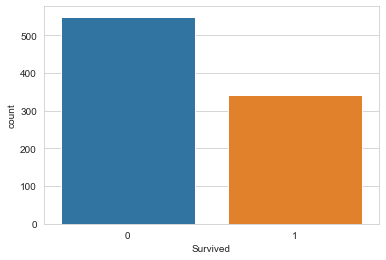

In [121]:
sns.countplot(x='Survived', data=tit);

OBSERVATION:

As we can see '0' has the value > 500 means these people didn't survived in the disaster & approx 350 people survived.
It is the same observation we have seen above.

Pclass- Feature

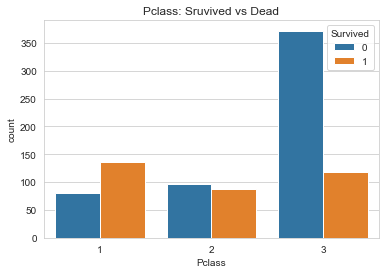

In [122]:
sns.countplot('Pclass', hue='Survived', data=tit)
plt.title('Pclass: Sruvived vs Dead')
plt.show()

OBSERVATION:


In above visualization plot we can see Persons who were travelling in 3rd class , mostly of them died or didn't survived than other class passengers.

Persons who were travelling in 2nd class, out of them almost equal number of people died and survived.

Persons who were travelling in 1st class, out of them large number of people survived and also fair number of persons died.

So as the conclusion we can say that person who were travelling in lower class like 3rd has higher chances to died. & persons who were travelling in higher class like 1st has higher chance to survive.

Sex- Feature

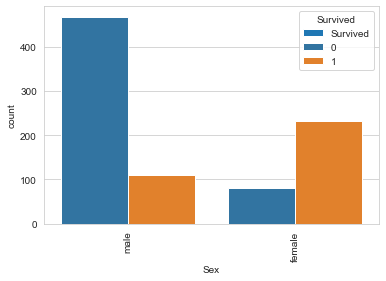

In [123]:
tit[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()
sns.countplot('Sex',hue='Survived',data=tit,)
plt.show()

OBSERVATION:

As we can see in above plot Out of all male passengers mostly of them died. And out of all Female passengers most of them survived.

So as the conclusion we can say male passenger has higher chances to die and female passengers has higher chance to survive.Or Because of Ladies First policy , priorities were given to female passengers so the chances of survival for female passengers is increased than male passengers.

Sibsp Feature

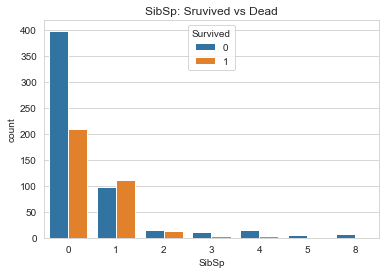

In [124]:
sns.countplot('SibSp', hue='Survived', data=tit)
plt.title('SibSp: Sruvived vs Dead')
plt.show()

OBSERVATIONS:

Passengers who have 0 siblings mostly of them died.

Passengers with 1 sibling has equally chance for both die and survive.

But wait its interesting. passengers who have higher number of siblings like 3 , 4 , 5, 8 has a very low chance to survive or 

almost 0% chance to survive. 

Parch Feature

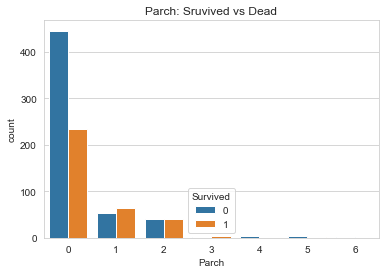

In [125]:
sns.countplot('Parch', hue='Survived', data=tit)
plt.title('Parch: Sruvived vs Dead')
plt.show() 

OBSERVATION:

Passengers who have 0 parents/children most of them died.

Passengers with 1 parents/children has equally chance for both die and survive.

But wait its interesting. passengers who have higher number of children like 3 , 4 , 5, 8 has a very low chance to survive or

almost 0% chance to survive.

Age Feature

In [126]:
tit["Age"].median()

28.0

Age feature consist some null values so first it  needs to be handled. 
Replacing null values with median of Age Feature. 
As observed above, median of Age feature is 28.
Age is a numerical feature so we can’t plot a count plot for Age feature. we need to plot pdf for Age Feature.

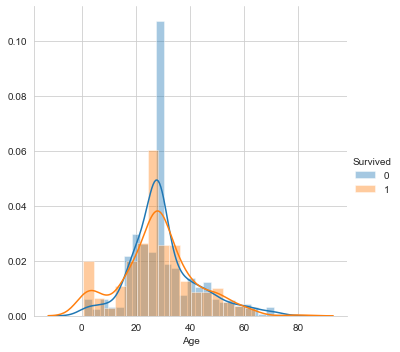

In [127]:

tit["Age"]= tit["Age"].fillna(28)

sns.FacetGrid(tit, hue="Survived", size=5) \
   .map(sns.distplot, "Age") \
   .add_legend()
plt.show()

OBSERVATIONS:

Above visualizations are almost overlapping on each other. so we can not conclude anything big clearly. but some of the conclusions are listed bellow.

Passengers who have age <20 years so child's or teenagers , out of them numbers of passengers who survived is greater than numbers of people who died. Means while Rescuing priorities were given to child's or teenagers.

Persons who have age >20 years and <45 years. Out of them numbers of passengers who died is greater than numbers of passengers who survived.

People with age greater then 65 almost all of them died.

Fare feature

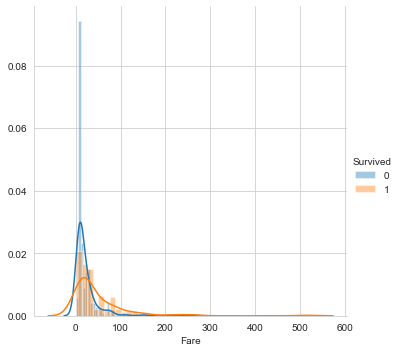

In [128]:
sns.FacetGrid(tit, hue="Survived", size=5) \
   .map(sns.distplot, "Fare") \
   .add_legend()
plt.show()

OBSERVATION:

Passengers who paid low fair has a higher chances to die.

On the other hand passengers who paid high fair has a higher chance to survive.

This observation is same like pclass persons who were rich has higher chance to survive and poor lower chance to survive.

Embarked Feature

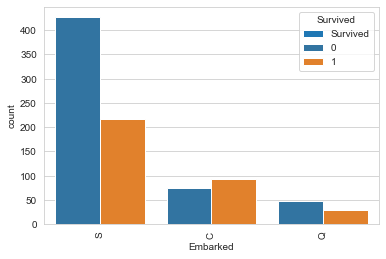

In [129]:
tit[['Embarked','Survived']].groupby(['Embarked']).mean().plot.bar()
sns.countplot('Embarked',hue='Survived',data=tit,)
plt.show()

OBSERVATION:

Passengers who started his journey from Southampton , most of them died.

There is not any much difference in peoples surviving or die chances who started his journey from Cherbourg , Queenstown .

Using  only 4 features to  perform analysis

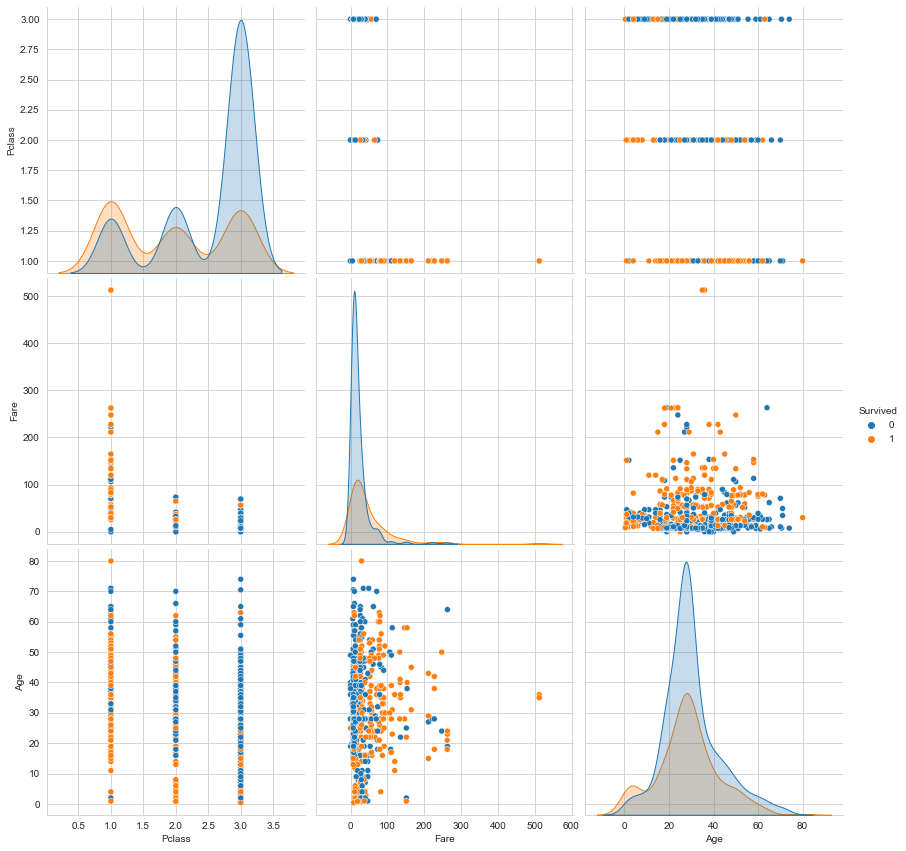

In [130]:
sns.set_style("whitegrid");
sns.pairplot(tit[["Survived","Pclass","Fare","Age"]], hue="Survived", size=4);
plt.show()

OBSERVATION:

From the above grid of plots we can see that, passengers who paid higher fare or travelling in upper class has a higher chances to survive.

Age is also giving some info like young persons have a higher chance to survive than old peoples.



<AxesSubplot:>

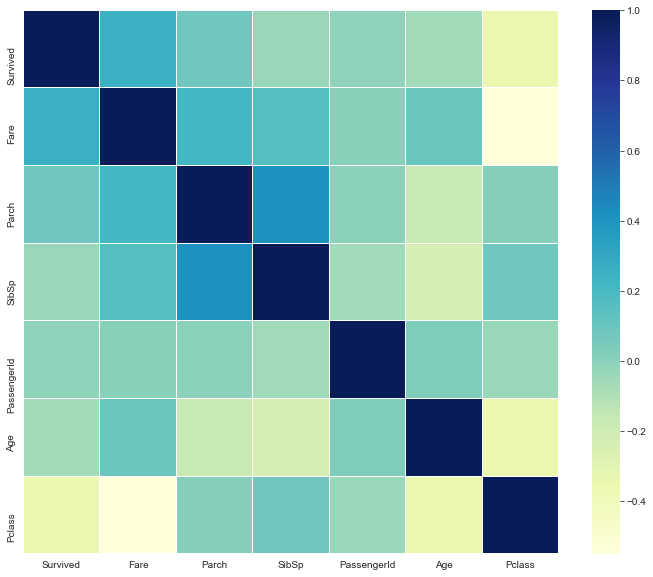

In [131]:
corrmat =tit.corr(method='spearman')
k = 12 
cols = corrmat.nlargest(k, 'Survived')['Survived'].index
cm = np.corrcoef(tit[cols].values.T)
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(cm, ax=ax, cmap="YlGnBu", linewidths=0.1, yticklabels=cols.values, xticklabels=cols.values)

OBSERVATIONS:

Survived feature has a negative correlation with Pclass feature

Survived feature has a positive correlation with Age feature

Survived feature has a negative correlation with SibSp feature

Survived feature has a positive correlation with Fare feature


Finding Outliers

<AxesSubplot:>

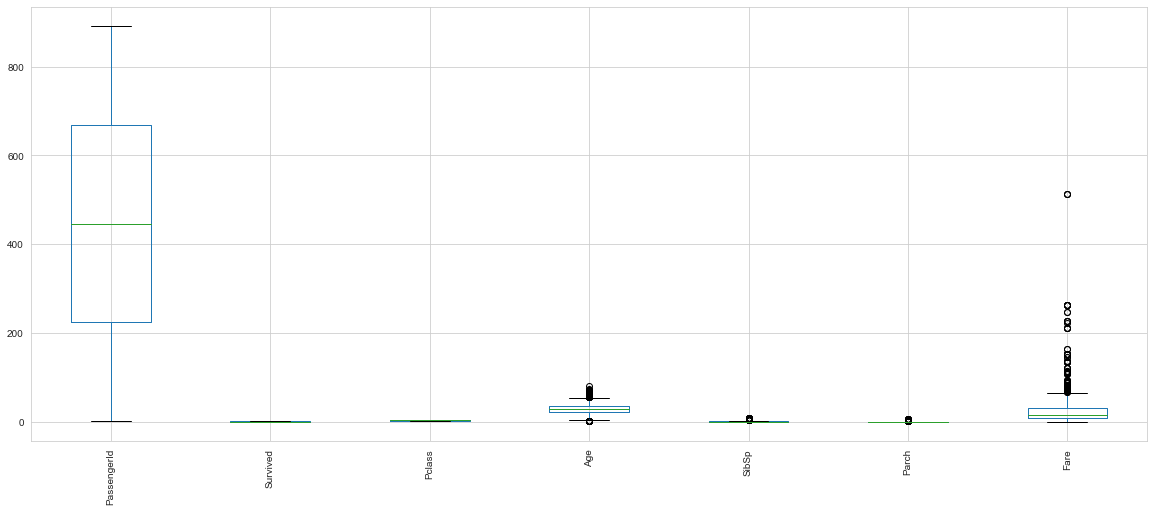

In [132]:
tit.boxplot( rot = 90, figsize=(20,8))

OBSERVTIONS:

There are outliers present in Age and Fare columns

Fare column has the highest amount of ourliers

  -------------------------------------

Removing outliers

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

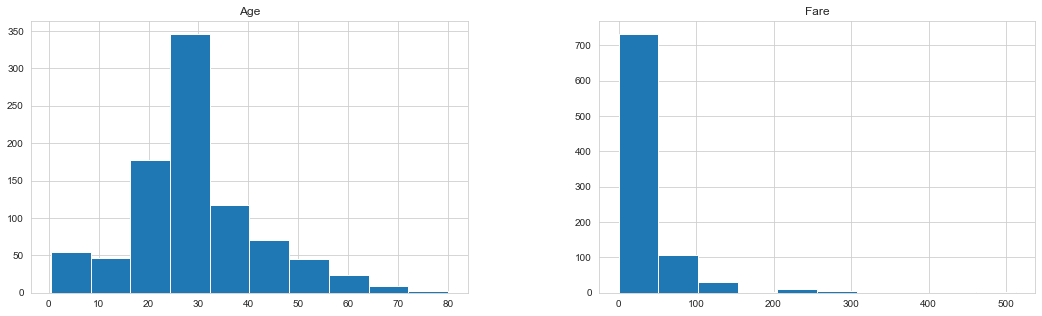

In [133]:
tit.hist(['Age', 'Fare'], figsize=(18,5))

OBSERVATION:

Age : Selected. The distribution is good.

Fare: Selected. Outliers seen beyond 300, need to treat them.

Replacing outliers for 'Fare'

In [134]:
tit['Fare'][tit['Fare']<300].sort_values(ascending=False)

341    263.000
438    263.000
27     263.000
88     263.000
311    262.375
        ...   
277      0.000
633      0.000
302      0.000
597      0.000
271      0.000
Name: Fare, Length: 888, dtype: float64

OBSERVATION:

Above result shows the nearest logical value is 263.0, hence, replacing any value above 300 with it.

In [135]:
tit['Fare'][tit['Fare']>300] = 263.0

OBSERVATION:

Saving the new values in the datasheet

and replaced outliers with logical value i.e 263.0

---------------

---------------

# Data Preprocessing

Dropping ‘PassengerId’ from the dataset set

In [136]:
tit = tit.drop(['PassengerId'], axis=1)

OBSERVATION:

Dropped ‘PassengerId’ from the train set, because it does not contribute to a persons survival probability.

Creating new Feature with Cabin column

In [137]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [tit]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)

tit = tit.drop(['Cabin'], axis=1)


OBSERVATION:

A cabin number looks like ‘C123’ and the letter refers to the deck.

A new feature has been created that contains a persons deck.

Afterwords we will convert the feature into a numeric variable. 

The missing values will be converted to zero. 

Replacing missing values in Embarked feature

In [138]:
common_value = 'S'
data = [tit]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

OBSERVATION:

Embarked feature has only 2 missing values, it was replaced by most common value in Embarked column.

# Converting Features:

In [139]:
tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
 10  Deck      891 non-null    int32  
dtypes: float64(2), int32(1), int64(4), object(4)
memory usage: 73.2+ KB


OBSERVATION:

Above you can see that Age, SibSp, Parch, Fare is a float

categorical features: Name, Sex, Ticket and Embarked.

Deck is int32

Converting Age, SibSp, Parch, Fare, Deck to int

In [140]:
data = [tit]

for dataset in data:
    
    dataset['Fare'] = dataset['Fare'].astype(int)

    dataset['Parch'] = dataset['Parch'].astype(int)
    dataset['SibSp'] = dataset['SibSp'].astype(int)
    dataset['Deck'] = dataset['Deck'].astype(int)

OBSERVATION

Age, SibSp, Parch, Fare, Deck has been successfully converted to int

Using name feature to extract details

In [141]:
ata = [tit]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
  
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
    dataset['Title'] = dataset['Title'].map(titles)
    
    dataset['Title'] = dataset['Title'].fillna(0)
tit = tit.drop(['Name'], axis=1)


OBSERVATION:

Name feature is used to extract the Titles from the Name, so that we can build a new feature out of that.

the titles are set as 

"Mr": 1

"Miss": 2

"Mrs": 3

"Master": 4

"Rare": 5

Convert ‘Sex’ feature into numeric. 

In [142]:
genders = {"male": 0, "female": 1}
data = [tit]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

OBSERVATION:

sex has been converted as o for male and 1 for female 

Dropping Ticket column

In [143]:
tit= tit.drop(['Ticket'], axis=1)

OBSERVATION:

Ticket column has been successfully removed

Convert ‘Embarked’ feature into numeric.

In [144]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [tit]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

OBSERVATION:

The Embarked feature has been successfully converted to "S": 0, "C": 1, "Q": 2

# Creating Categories:

Age:

In [147]:

data = [tit]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6



OBSERVATION

 Age column is used to create a new ‘AgeGroup” variable, by categorizing every age into a group

Fare

In [148]:
data = [tit]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

# Creating new Features

Age times Class

In [149]:
data = [tit]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

In [ ]:
Fare per Person

In [152]:
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['Parch']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)
# Let's take a last look at the training set, before we start training the models.
tit.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,8,1,6,0
1,1,1,1,5,1,0,3,1,3,3,5,3
2,1,3,1,3,0,0,0,0,8,2,9,0
3,1,1,1,5,1,0,3,0,3,3,5,3
4,0,3,0,5,0,0,1,0,8,1,15,1
5,0,3,0,4,0,0,1,2,8,1,12,1
6,0,1,0,6,0,0,3,0,5,1,6,3
7,0,3,0,0,3,1,2,0,8,4,0,1
8,1,3,1,3,0,2,1,0,8,3,9,0
9,1,2,1,1,1,0,2,1,8,3,2,2


# Building Machine Learning Models

In [160]:
X = tit.drop("Survived", axis=1)
Y = tit["Survived"]


In [164]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.25, random_state=45)

Stochastic Gradient Descent (SGD):

In [165]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

Random Forest:

In [166]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)


Logistic Regression:

In [167]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

Decision Tree

In [171]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test) 
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

# best Model 

In [173]:
results = pd.DataFrame({
    'Model': [ 'Logistic Regression', 
              'Random Forest', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_log, 
              acc_random_forest,
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
92.81,Random Forest
92.81,Decision Tree
80.69,Logistic Regression
65.27,Stochastic Gradient Decent


the Random Forest classifier goes on the first place.

# K-Fold Cross Validation:

In [174]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.85074627 0.8358209  0.8358209  0.82089552 0.80597015 0.79104478
 0.82089552 0.80597015 0.81818182 0.74242424]
Mean: 0.8127770239710538
Standard Deviation: 0.028599312863418002


model has a average accuracy of 81% with a standard deviation of 0.02 %.

# Feature importance

In [175]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Title,0.205
Sex,0.156
Age_Class,0.105
Deck,0.093
SibSp,0.084
Age,0.071
Pclass,0.067
Fare,0.067
Fare_Per_Person,0.065


# Hyperparameter Tuning

In [176]:
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}
from sklearn.model_selection import GridSearchCV, cross_val_score
rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, Y_train)
clf.bestparams

KeyboardInterrupt: 

In [177]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[354,  50],
       [ 75, 189]], dtype=int64)

saving model

In [179]:
import joblib
joblib.dump(clf.best_estimator_,"bsp.obj")

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'